In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
DATA_PATH = 'C:/Users/campus3S031/Desktop/iMBank/iM_DiGital_Banker_academy/projects/iMBank_pj1/sampled_data'
data_21 = pd.read_csv(f'{DATA_PATH}/merged_full_2021.csv')
data_22 = pd.read_csv(f'{DATA_PATH}/merged_full_2022.csv')
data_23 = pd.read_csv(f'{DATA_PATH}/merged_full_2023.csv')


In [29]:
print(data_21.shape, data_22.shape, data_23.shape)

(780608, 19) (811051, 19) (841770, 19)


## 우수고객 수 조회
- 충성고객이란 카드 사용 기록도 있으면서 동시에 수신 기록도 있는 사람들
- 이 사람들은 iM뱅크와의 연결을 끊지는 않을 것이다!
- 즉, 두 테이블을 합친 데이터에서 NaN이 없어야 한다!

In [30]:
# 우수고객 수 -> 우상향...이긴 하다.

tmp_21 = data_21.dropna()
tmp_22 = data_22.dropna()
tmp_23 = data_23.dropna()
print(tmp_21.shape, tmp_22.shape, tmp_23.shape)

(69287, 19) (71285, 19) (73912, 19)


In [31]:
tmp_21['연령대'].value_counts()

연령대
50대      15997
40대      15092
20대      13004
60대이상    11098
30대      11088
10대미만     3008
Name: count, dtype: int64

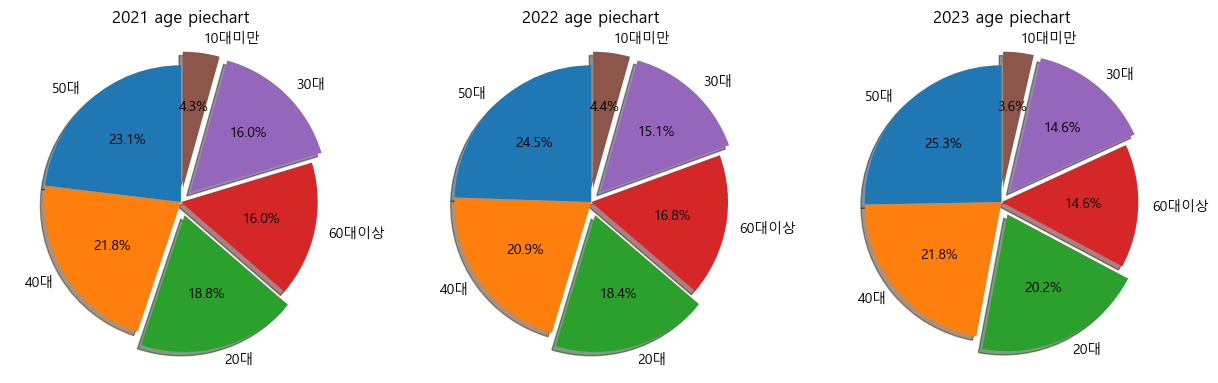

In [32]:
explode = (0,0,0.1,0,0.1,0.1)

fig, ax = plt.subplots(1,3,figsize = (15,5))

age_counts_21 = tmp_21['연령대'].value_counts()
labels = age_counts_21.index.tolist()

ax[0].pie(tmp_21['연령대'].value_counts(), 
       explode=explode,
       labels = labels, 
       autopct = '%1.1f%%',
       shadow = True, startangle= 90)
ax[0].set_title("2021 age piechart")

ax[1].pie(tmp_22['연령대'].value_counts(), 
       explode=explode,
       labels = labels, 
       autopct = '%1.1f%%',
       shadow = True, startangle= 90)
ax[1].set_title("2022 age piechart")

ax[2].pie(tmp_23['연령대'].value_counts(), 
       explode=explode,
       labels = labels, 
       autopct = '%1.1f%%',
       shadow = True, startangle= 90)
ax[2].set_title("2023 age piechart")

plt.show()

## MZ 조회 및 연령대 시각화
- MZ는 10대, 20대, 30대를 포함한다.
- '문제 선정' 파트에 사용 가능할 것 같다
- MZ 확보가 절실함

In [33]:
tmp_21 = data_21[data_21['연령대'].isin(['20대','30대'])]
tmp_22 = data_22[data_22['연령대'].isin(['20대','30대'])]
tmp_23 = data_23[data_23['연령대'].isin(['20대','30대'])]

print(f'{tmp_21['연령대'].value_counts()} \n ----------- \n {tmp_22['연령대'].value_counts()} \n ------------ \n {tmp_23['연령대'].value_counts()}')

연령대
20대    37198
30대    35611
Name: count, dtype: int64 
 ----------- 
 연령대
20대    37661
30대    36616
Name: count, dtype: int64 
 ------------ 
 연령대
20대    39497
30대    39335
Name: count, dtype: int64


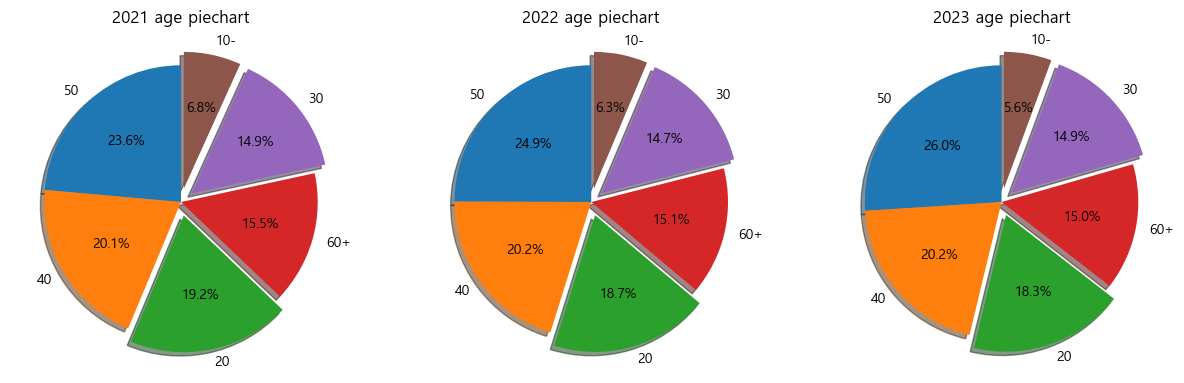

In [34]:
explode = (0,0,0.1,0,0.1,0.1)

fig, ax = plt.subplots(1,3,figsize = (15,5))

labels = ['50', '40', '20', '60+', '30', '10-']
ax[0].pie(data_21['연령대'].value_counts(), 
       explode=explode,
       labels = labels, 
       autopct = '%1.1f%%',
       shadow = True, startangle= 90)
ax[0].set_title("2021 age piechart")

ax[1].pie(data_22['연령대'].value_counts(), 
       explode=explode,
       labels = labels, 
       autopct = '%1.1f%%',
       shadow = True, startangle= 90)
ax[1].set_title("2022 age piechart")

ax[2].pie(data_23['연령대'].value_counts(), 
       explode=explode,
       labels = labels, 
       autopct = '%1.1f%%',
       shadow = True, startangle= 90)
ax[2].set_title("2023 age piechart")

plt.show()

# 음식업 시각화
- 왜 음식업을 주제로 잡았는가? 에 대한 대답
- 실제로 MZ세대에 음식업이 의미가 있어야 한다.

In [35]:
tmp_21.head(3)

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,기준년월,연령대,성별,고객등급,자택_시도,자택_시군구,수신_요구불예금,수신_거치식예금,수신_적립식예금,수신_펀드,수신_외화예금,대출금액
0,NaN,2800588947,NaN,NaN,NaN,NaN,NaN,202112.0,30대,남,일반등급,경기도,고양시 일산서구,100000.0,0.0,0.0,0.0,0.0,100000.0
1,NaN,2800758915,NaN,NaN,NaN,NaN,NaN,202112.0,30대,여,일반등급,경상북도,안동시,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,2801388562,NaN,NaN,NaN,NaN,NaN,202112.0,20대,여,일반등급,인천광역시,서구,0.0,0.0,0.0,0.0,0.0,100000.0


In [36]:
# 각 연도별 20~30대 카드 사용 중 상위 10개 항목 추출

v_data_21 = pd.DataFrame(tmp_21['가맹점업종명'].value_counts().head(10))
v_data_22 = pd.DataFrame(tmp_22['가맹점업종명'].value_counts().head(10))
v_data_23 = pd.DataFrame(tmp_23['가맹점업종명'].value_counts().head(10))

In [37]:
# 시각화를 위한 데이터 전처리
v_data_all = pd.concat([v_data_21, v_data_22, v_data_23], axis = 1)
v_data_all.columns = [2021,2022,2023]
#v_data_all = v_data_all.reset_index()

v_data_all = v_data_all.div(v_data_all.sum(axis=0), axis = 1).fillna(0)
v_data_all

,2021,2022,2023
가맹점업종명,,,
인터넷P/G,0.202220,0.203544,0.194730
일반한식,0.181598,0.181489,0.183066
편 의 점,0.169588,0.175150,0.177782
서양음식,0.165464,0.178061,0.172636
슈퍼마켓,0.091041,0.082401,0.074722
스넥,0.044641,0.040360,0.036023
택시,0.039789,0.036544,0.039317
인터넷종합Mall,0.037545,0.034797,0.044463
대형할인점,0.034330,0.033374,0.000000


In [38]:
# 한글 패치 진행

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

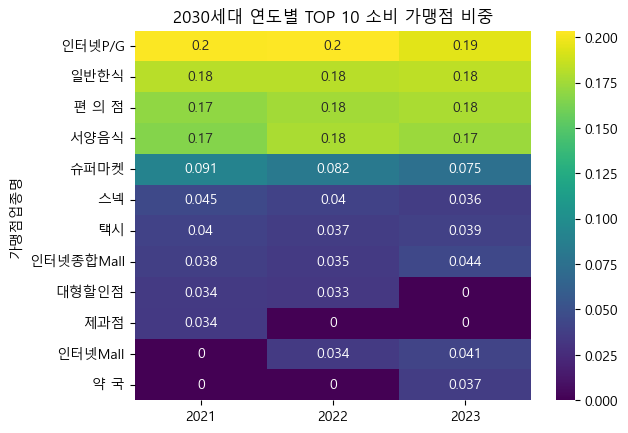

In [39]:
fig, ax = plt.subplots()
sns.heatmap(v_data_all, annot=True, 
            cmap="viridis").set_title('2030세대 연도별 TOP 10 소비 가맹점 비중')

plt.show()

# 비교군 4050 세대 시각화
- 2030세대와 차이점이 있는지?
- 있다면, 어떤 요인으로 인해 차이가 났는지?
- 여기서 통계기법을 사용할 수 있지 않을까?
    - 두 집단 비교

In [40]:
tmp_21_2 = data_21[data_21['연령대'].isin(['40대','50대'])]
tmp_22_2 = data_22[data_22['연령대'].isin(['40대','50대'])]
tmp_23_2 = data_23[data_23['연령대'].isin(['40대','50대'])]

In [41]:
# 각 연도별 40~50대 카드 사용 중 상위 10개 항목 추출

v_data_21_2 = pd.DataFrame(tmp_21_2['가맹점업종명'].value_counts().head(10))
v_data_22_2 = pd.DataFrame(tmp_22_2['가맹점업종명'].value_counts().head(10))
v_data_23_2 = pd.DataFrame(tmp_23_2['가맹점업종명'].value_counts().head(10))

In [42]:
# 시각화를 위한 데이터 전처리
v_data_all_2 = pd.concat([v_data_21_2, v_data_22_2, v_data_23_2], axis = 1)
v_data_all_2.columns = [2021,2022,2023]
#v_data_all = v_data_all.reset_index()

v_data_all_2 = v_data_all_2.div(v_data_all_2.sum(axis=0), axis = 1).fillna(0)
v_data_all_2

,2021,2022,2023
가맹점업종명,,,
일반한식,0.254763,0.252643,0.257167
슈퍼마켓,0.159873,0.150156,0.134413
편 의 점,0.124641,0.129367,0.134843
인터넷P/G,0.118952,0.120054,0.124904
서양음식,0.101832,0.114517,0.122611
약 국,0.056631,0.062720,0.060828
대형할인점,0.053134,0.047770,0.040042
스넥,0.047288,0.043693,0.048070
제과점,0.041651,0.040018,0.038417


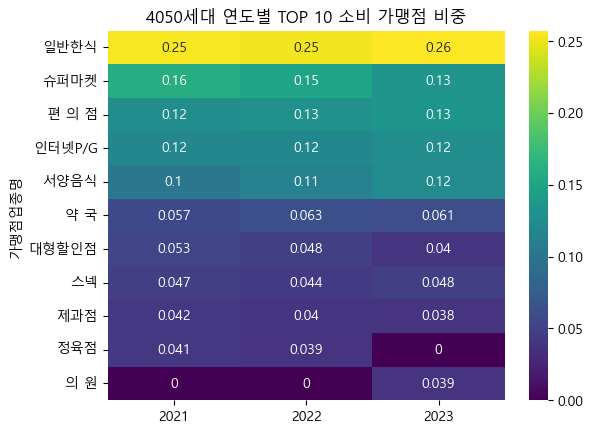

In [43]:
fig, ax = plt.subplots()
sns.heatmap(v_data_all_2, annot=True, 
            cmap="viridis").set_title('4050세대 연도별 TOP 10 소비 가맹점 비중')

plt.show()

# 식생활 소비 기준 및 해당 데이터 전처리
- '식생활 소비'로 분류 될 수 있는 가맹점 결재 
- 이후 하위 요식업으로 분류 할 수 있는지 알아보기

In [44]:
# '식생활소비' 로 분류될 수 있는 칼럼들
# 언제든지 수정 가능
# 상위 10% 이하는 조금 무의미한 모습을 보여준다 -> 하나로 통일?

food_market = [
    '일반한식',
    '슈퍼마켓',
    '편 의 점',
    '서양음식',
    '스넥',
    '제과점',
    '정육점',
    '농·축·수산품',
    '중국식',
    '기타음료식품',
    '일식·회집',
    '주점',
    '유흥주점',
    '단란주점',
    '농축수산가공품',
    '칵테일바',
    '주류판매점',
    '갈비전문점',
    '한정식'
    ]

In [45]:
# 나이대별로 구분해서 식생활 소비 관련 데이터 추출및 저장

dietary_consumption_2030_21 = tmp_21[tmp_21['가맹점업종명'].isin(food_market)]
dietary_consumption_2030_22 = tmp_22[tmp_22['가맹점업종명'].isin(food_market)]
dietary_consumption_2030_23 = tmp_23[tmp_23['가맹점업종명'].isin(food_market)]

dietary_consumption_4050_21 = tmp_21_2[tmp_21_2['가맹점업종명'].isin(food_market)]
dietary_consumption_4050_22 = tmp_22_2[tmp_22_2['가맹점업종명'].isin(food_market)]
dietary_consumption_4050_23 = tmp_23_2[tmp_23_2['가맹점업종명'].isin(food_market)]

data_list_2030 = [dietary_consumption_2030_21, dietary_consumption_2030_22, dietary_consumption_2030_23]
data_list_4050 = [dietary_consumption_4050_21, dietary_consumption_4050_22, dietary_consumption_4050_23]


In [54]:
dietary_consumption_2030_21['year'] = 2021
dietary_consumption_2030_22['year'] = 2022
dietary_consumption_2030_23['year'] = 2023

dietary_consumption_4050_21['year'] = 2021
dietary_consumption_4050_22['year'] = 2022
dietary_consumption_4050_23['year'] = 2023

dietary_consumption_2030 = pd.concat([dietary_consumption_2030_21,dietary_consumption_2030_22,dietary_consumption_2030_23], axis = 0)
dietary_consumption_4050 = pd.concat([dietary_consumption_4050_21,dietary_consumption_4050_22,dietary_consumption_4050_23], axis = 0)

C:\Users\campus3S031\AppData\Local\Temp\ipykernel_11560\2183355009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dietary_consumption_2030_21['year'] = 2021
C:\Users\campus3S031\AppData\Local\Temp\ipykernel_11560\2183355009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dietary_consumption_2030_22['year'] = 2022
C:\Users\campus3S031\AppData\Local\Temp\ipykernel_11560\2183355009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

### 데이터 저장 - 식습관 건수만

In [46]:
def save_modified_data(df_list_2030, df_list_4050):
    
    file_names_2030 = [
        "dietary_consumption_2030_21.csv",
        "dietary_consumption_2030_22.csv",
        "dietary_consumption_2030_23.csv"
    ]

    file_names_4050 = [
        "dietary_consumption_4050_21.csv",
        "dietary_consumption_4050_22.csv",
        "dietary_consumption_4050_23.csv"
    ]


    for df, name in zip(df_list_2030, file_names_2030):
        df.to_csv(f"sampled_data/{name}", index = False)
        print(f"Saved {name}")

    for df, name in zip(df_list_4050, file_names_4050):
        df.to_csv(f"sampled_data/{name}", index = False)
        print(f"Saved {name}")

save_modified_data(data_list_2030, data_list_4050)

Saved dietary_consumption_2030_21.csv
Saved dietary_consumption_2030_22.csv
Saved dietary_consumption_2030_23.csv
Saved dietary_consumption_4050_21.csv
Saved dietary_consumption_4050_22.csv
Saved dietary_consumption_4050_23.csv


In [57]:
dietary_consumption_2030.to_csv(f"sampled_data/dietary_consumption_2030.csv", index = False)
dietary_consumption_4050.to_csv(f"sampled_data/dietary_consumption_4050.csv", index = False)
print(f"Saved complete")

Saved complete


In [60]:
dietary_consumption_2030.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35616 entries, 106 to 830357
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   거래년월      35616 non-null  float64
 1   고객ID      35616 non-null  int64  
 2   가맹점업종명    35616 non-null  object 
 3   가맹점_광역시도  35616 non-null  object 
 4   가맹점_시군구   35616 non-null  object 
 5   승인건수      35616 non-null  object 
 6   승인금액      35616 non-null  float64
 7   기준년월      35616 non-null  float64
 8   연령대       35616 non-null  object 
 9   성별        35616 non-null  object 
 10  고객등급      35616 non-null  object 
 11  자택_시도     35616 non-null  object 
 12  자택_시군구    35616 non-null  object 
 13  수신_요구불예금  35616 non-null  float64
 14  수신_거치식예금  35616 non-null  float64
 15  수신_적립식예금  35616 non-null  float64
 16  수신_펀드     35616 non-null  float64
 17  수신_외화예금   35616 non-null  float64
 18  대출금액      35616 non-null  float64
 19  year      35616 non-null  int64  
dtypes: float64(9), int64(2), objec

# 시각화


C:\Users\campus3S031\AppData\Local\Temp\ipykernel_11560\358553804.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = dietary_consumption_2030_21, x = '가맹점업종명', y = '승인금액' ,hue ='성별', ci = None ,ax = ax[0]).set_title("2030사용자 가맹점 업종 기준 승인 금액 평균 2021")
C:\Users\campus3S031\AppData\Local\Temp\ipykernel_11560\358553804.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = dietary_consumption_4050_21, x = '가맹점업종명', y = '승인금액' ,hue ='성별', ci = None ,ax = ax[1]).set_title("4050사용자 가맹점 업종 기준 승인 금액 평균 2021")


<function matplotlib.pyplot.show(close=None, block=None)>

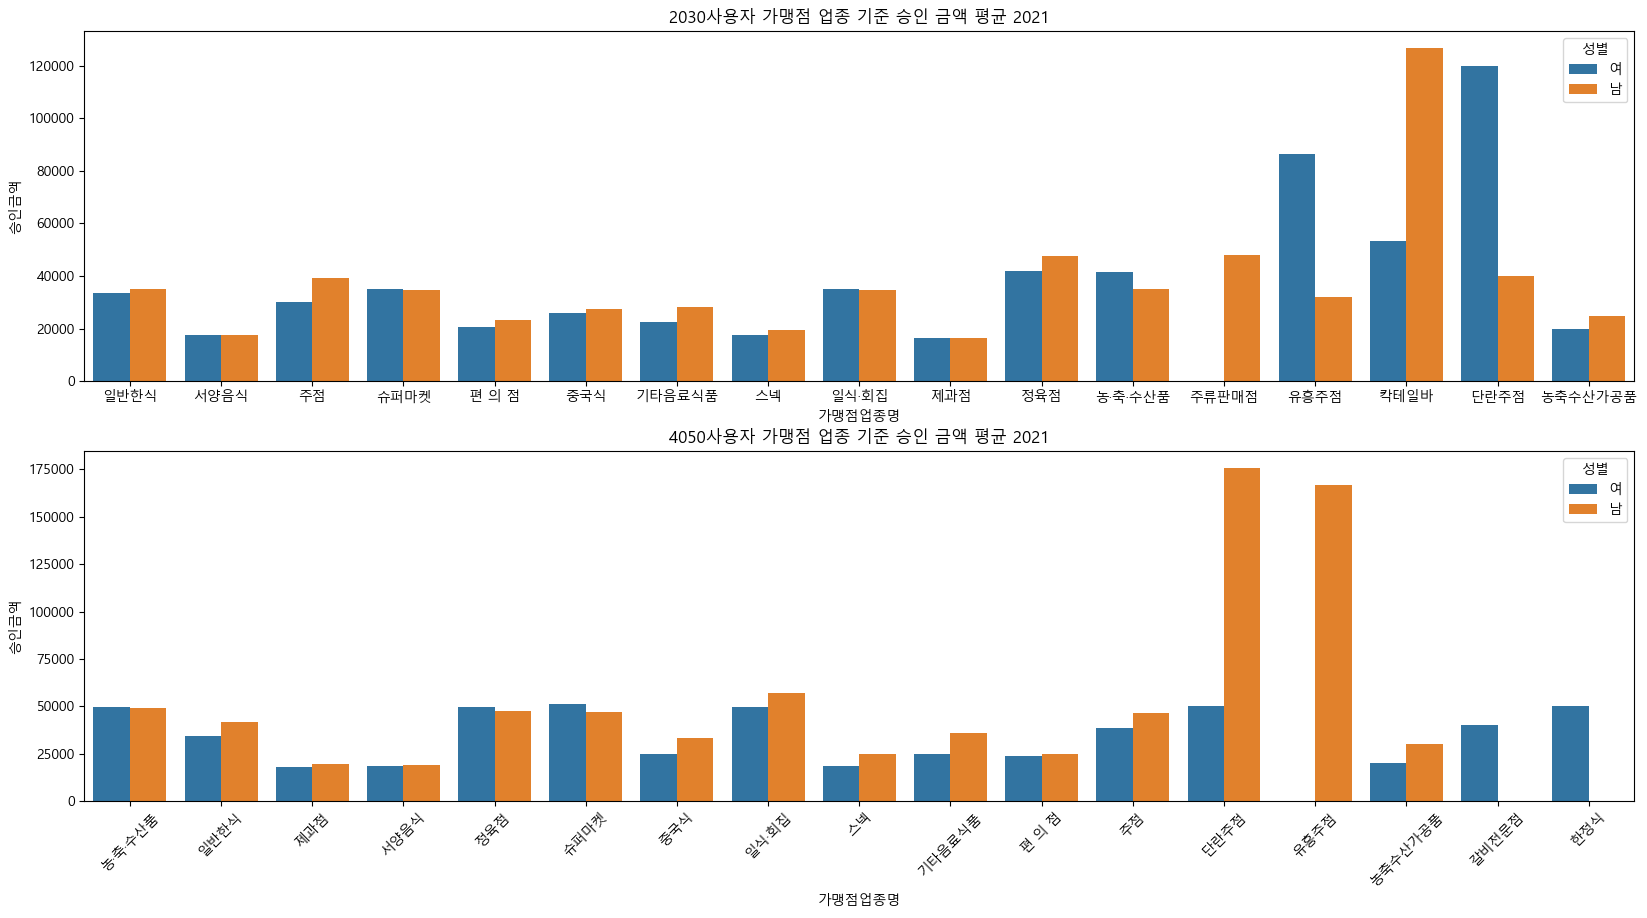

In [47]:
fig, ax = plt.subplots(2,1,figsize = (20,10))

sns.barplot(data = dietary_consumption_2030_21, x = '가맹점업종명', y = '승인금액' ,hue ='성별', ci = None ,ax = ax[0]).set_title("2030사용자 가맹점 업종 기준 승인 금액 평균 2021")
plt.xticks(rotation = 45)

sns.barplot(data = dietary_consumption_4050_21, x = '가맹점업종명', y = '승인금액' ,hue ='성별', ci = None ,ax = ax[1]).set_title("4050사용자 가맹점 업종 기준 승인 금액 평균 2021")
plt.xticks(rotation = 45)

plt.show

### Butterfly Chart를 써보자

In [48]:
# 소비 횟수 시각화용 데이터 생성

count_data_2030_21 = dietary_consumption_2030_21.groupby(['가맹점업종명', '성별']).size().reset_index(name='count').sort_values(by = 'count', ascending=False)
count_data_4050_21 = dietary_consumption_4050_21.groupby(['가맹점업종명', '성별']).size().reset_index(name='count').sort_values(by = 'count', ascending=False)

count_data_2030_22 = dietary_consumption_2030_22.groupby(['가맹점업종명', '성별']).size().reset_index(name='count').sort_values(by = 'count', ascending=False)
count_data_4050_22 = dietary_consumption_4050_22.groupby(['가맹점업종명', '성별']).size().reset_index(name='count').sort_values(by = 'count', ascending=False)

count_data_2030_23 = dietary_consumption_2030_23.groupby(['가맹점업종명', '성별']).size().reset_index(name='count').sort_values(by = 'count', ascending=False)
count_data_4050_23 = dietary_consumption_4050_23.groupby(['가맹점업종명', '성별']).size().reset_index(name='count').sort_values(by = 'count', ascending=False)

In [49]:
# Butterfly Plot 그리기 함수

def set_butterfly_foodcount(df1, df2, year = 2020):

    # Butterfly Chart

    plt.figure(figsize = (10,6))

    # 데이터 그리기
    sns.barplot(data = df1, y = '가맹점업종명', x = 'count' , color = 'BLue', label = '2030', errorbar=None)
    sns.barplot(data = df2, y = '가맹점업종명', x = 'count' , color = 'Red', label = '4050', errorbar=None ,estimator = lambda x: -sum(x))

    # 축과 레이블 설정
    plt.axvline(0, color = 'grey', linestyle = '--')
    plt.axis('tight')
    plt.subplots_adjust(left = 0.1, right = 0.9, top = 0.9, bottom = 0.1)

    plt.gca().spines['top'].set_visible(False)   
    plt.gca().spines['right'].set_visible(False) 
    plt.gca().spines['left'].set_visible(False)    
    plt.gca().spines['bottom'].set_visible(False)   

    plt.title(f"{year}년 세대별 식습관 소비 횟수 비교", fontsize=17)
    plt.show()


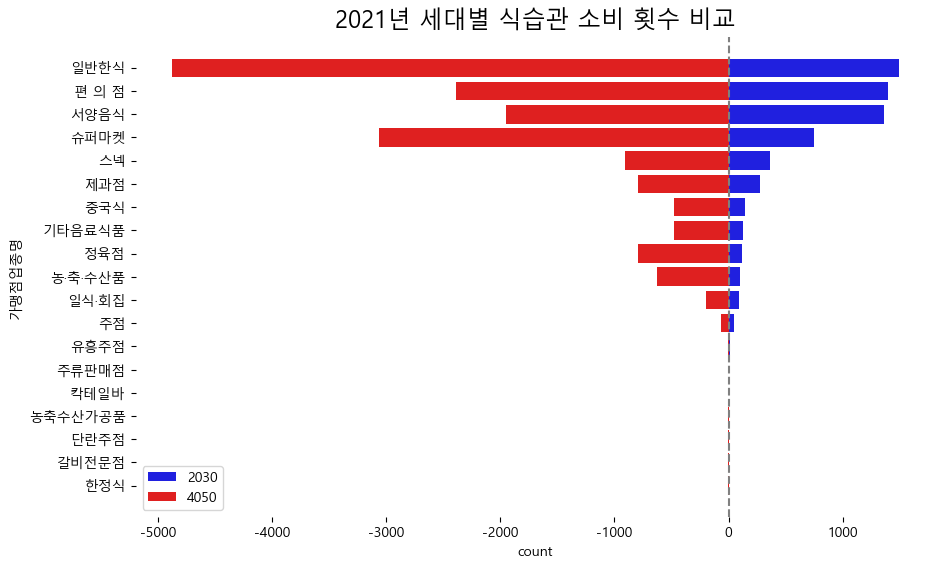

In [50]:
set_butterfly_foodcount(count_data_2030_21, count_data_4050_21, 2021)

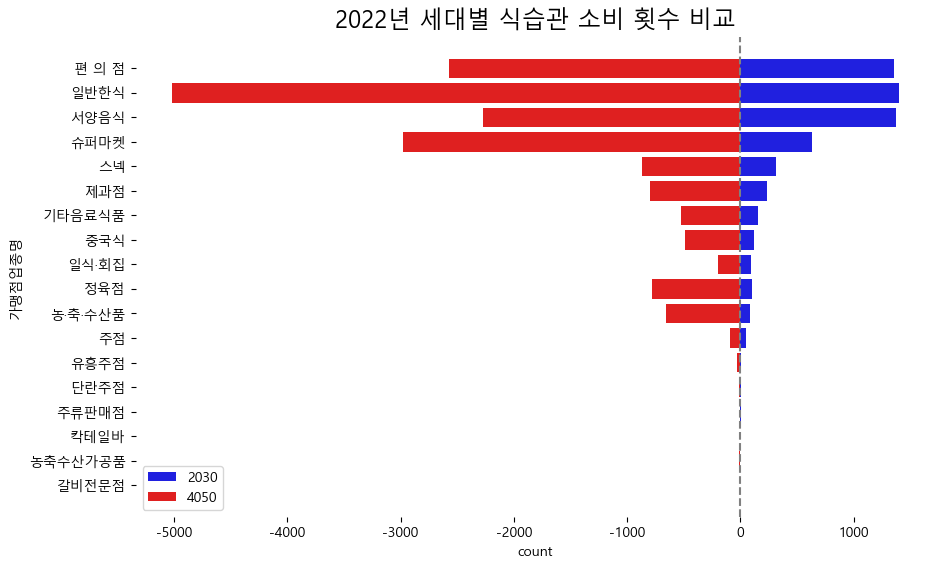

In [51]:
set_butterfly_foodcount(count_data_2030_22, count_data_4050_22, 2022)

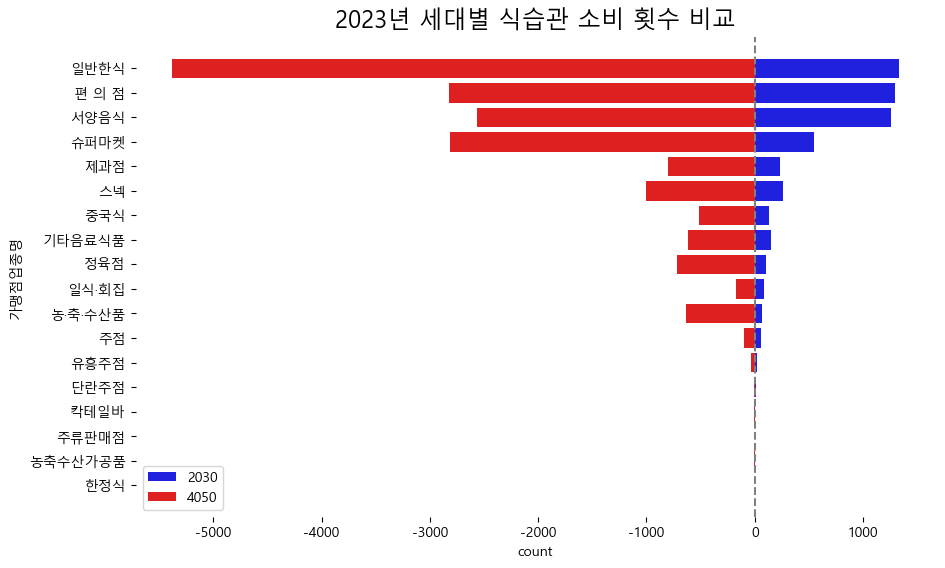

In [52]:
set_butterfly_foodcount(count_data_2030_23, count_data_4050_23, 2023)

# 통계학을 기반으로 한 진짜진짜 간단한 시각화
- 캐글 데이터 비슷한거 

# 파생변수 만들기
- 필요하긴 할듯